In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

/Users/kacychou/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df= pd.read_csv("datasets/odyssey_features_updated.csv")

/Users/kacychou/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(df.head())

                          address BikeParking BusinessAcceptsCreditCards  \
0           2201 S Fort Apache Rd        True                       True   
1  6605 S Las Vegas Blvd, Ste 145         NaN                       True   
2        4225 E Sahara Ave, Ste 6        True                       True   
3  6700 W Charleston Blvd, Unit C        True                       True   
4  7160 North Durango Dr, Ste 110        True                       True   

  Caters CoatCheck GoodForKids HappyHour  HasTV OutdoorSeating  \
0  False       NaN        True       NaN   True           True   
1    NaN     False       False      True   True           True   
2   True       NaN        True       NaN   True          False   
3   True       NaN        True       NaN  False          False   
4   True       NaN        True       NaN   True           True   

  RestaurantsDelivery      ...       noise_average noise_loud noise_quiet  \
0               False      ...                True      False       F

In [7]:
y = df["stars"]
X = df[['ambience_romantic', 'ambience_intimate', 'ambience_classy', 'ambience_hipster', 'ambience_touristy', 'ambience_trendy', 
        'ambience_upscale', 'ambience_casual', 'good_for_dessert', 'good_for_latenight', 
        'good_for_lunch', 'good_for_dinner', 'good_for_breakfast', 'review_count', 'good_for_brunch','parking_garage', 
        'parking_street', 'parking_validated', 'parking_lot', 'parking_valet', 'bestnight_monday', 'full_bar',
        'beer_and_wine', 'bestnight_tuesday', 'bestnight_wednesday', 'bestnight_thursday','no_alcohol' ,'bestnight_friday', 'bestnight_sunday',
        'music_dj', 'music_background_music', 'music_karaoke', 'music_live', 'music_video', 'music_jukebox', 'smoking_outdoor',
        'smoking_no', 'smoking_yes', 'wifi_free', 'wifi_no', 'wifi_paid', 'noise_very_loud', 'noise_loud', 'noise_quiet',
        'noise_average', 'negative_reviews', 'neutral_reviews']]



In [8]:
# from sklearn.linear_model import Ridge
# def ridge_regression(data, predictors, alpha, models_to_plot={}):
#     #Fit the model
#     ridgereg = Ridge(alpha=alpha,normalize=True)
#     ridgereg.fit(data[predictors],data['y'])
#     y_pred = ridgereg.predict(data[predictors])
    
#     #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
    
#     #Return the result in pre-defined format
#     rss = sum((y_pred-data['y'])**2)
#     ret = [rss]
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
#     return ret

In [9]:
# #Initialize predictors to be set of 15 powers of x
# predictors=['x']
# predictors.extend(['x_%d'%i for i in range(2,16)])

# #Set the different values of alpha to be tested
# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# #Initialize the dataframe for storing coefficients.
# col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
# ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
# coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
# for i in range(10):
#     coef_matrix_ridge.iloc[i,] = ridge_regression(df, X, alpha_ridge[i], models_to_plot)

In [10]:
y = df["stars"]
X = df[['ambience_romantic', 'ambience_intimate', 'ambience_classy', 'ambience_hipster', 'ambience_touristy', 'ambience_trendy', 
        'ambience_upscale', 'ambience_casual', 'good_for_dessert', 'good_for_latenight', 
        'good_for_lunch', 'good_for_dinner', 'good_for_breakfast', 'review_count', 'good_for_brunch','parking_garage', 
        'parking_street', 'parking_validated', 'parking_lot', 'parking_valet', 'bestnight_monday', 'full_bar',
        'beer_and_wine', 'bestnight_tuesday', 'bestnight_wednesday', 'bestnight_thursday','no_alcohol' ,'bestnight_friday', 'bestnight_sunday',
        'music_dj', 'music_background_music', 'music_karaoke', 'music_live', 'music_video', 'music_jukebox', 'smoking_outdoor',
        'smoking_no', 'smoking_yes', 'wifi_free', 'wifi_no', 'wifi_paid', 'noise_very_loud', 'noise_loud', 'noise_quiet',
        'noise_average', 'negative_reviews', 'neutral_reviews']]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [12]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [15]:
print ("RR training score:", Ridge_train_score) 
print ("RR test score: ",Ridge_test_score)

RR training score: 0.19823780587746542
RR test score:  0.20158325930177345


In [16]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [19]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Text(0,0.5,'weights')

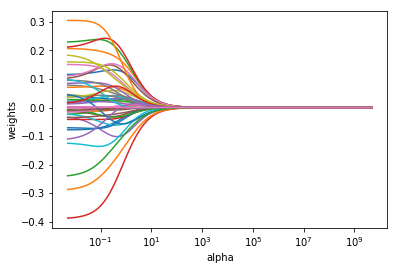

In [21]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [25]:
ridge2 = Ridge(alpha=3, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) 

ambience_romantic         0.076256
ambience_intimate         0.090622
ambience_classy           0.097741
ambience_hipster          0.094421
ambience_touristy        -0.046456
ambience_trendy           0.063479
ambience_upscale          0.082621
ambience_casual           0.024770
good_for_dessert          0.014981
good_for_latenight       -0.031488
good_for_lunch            0.020576
good_for_dinner           0.041276
good_for_breakfast        0.001153
review_count              0.000067
good_for_brunch           0.019250
parking_garage           -0.005692
parking_street            0.036640
parking_validated         0.016211
parking_lot               0.045404
parking_valet             0.016883
bestnight_monday         -0.007146
full_bar                  0.010877
beer_and_wine             0.015187
bestnight_tuesday        -0.017992
bestnight_wednesday       0.012585
bestnight_thursday        0.001650
no_alcohol                0.000000
bestnight_friday          0.019045
bestnight_sunday    

In [29]:
ridge2.score(y_test, pred2)

ValueError: Expected 2D array, got 1D array instead:
array=[3.36607143 3.88372093 3.96923077 3.59090909 3.15384615 4.13333333
 3.26582278 3.03846154 4.096      3.29411765 2.91780822 5.
 3.9375     2.28571429 3.75       2.95652174 3.15517241 4.01612903
 3.39685939 2.9047619  4.17523364 3.53571429 2.25       3.20276498
 3.71428571 3.33050847 4.05882353 3.25287356 2.98406375 4.00473037
 3.57692308 3.66666667 4.32332332 2.75       3.54977712 3.47204969
 4.13186813 3.5        4.14285714 3.38888889 4.3862069  3.50537634
 3.97101449 3.82352941 4.71551724 2.4        2.88349515 2.75438596
 3.61682243 2.77380952 3.48275862 3.53030303 3.65       3.75
 4.04225352 3.33333333 2.         2.45       3.25       3.04878049
 3.19672131 2.60839161 4.21195652 3.3        4.2962963  4.33333333
 2.18518519 3.69273743 3.83333333 2.52941176 3.53658537 2.83870968
 3.         3.41509434 2.86       3.62878788 3.66666667 2.64705882
 3.57142857 2.58333333 3.66666667 4.22222222 4.10816777 4.33333333
 3.57142857 3.47540984 3.         3.04651163 3.57142857 2.96153846
 2.33333333 2.5        2.57894737 4.05813953 3.86666667 4.24561404
 3.37241379 4.21601942 2.89130435 2.75       3.68518519 3.33333333
 4.35833333 3.12587413 2.734375   2.54237288 4.04347826 2.625
 3.56561086 4.14444444 3.09375    4.17462932 3.944      2.5
 4.06993007 3.33333333 4.13239437 3.72463768 2.14285714 3.1971831
 4.17857143 4.04700855 3.84615385 3.83088235 4.2        3.16326531
 1.33333333 2.35       2.61538462 2.72340426 4.63013699 3.85416667
 2.70833333 3.75       2.72972973 4.2        2.5        4.
 3.90879479 3.77777778 2.43571429 2.4        3.28571429 3.8
 3.68996188 2.76785714 3.44078947 3.29411765 3.66666667 1.66666667
 4.4        2.87428571 3.04290429 2.25       3.85294118 3.8
 3.6        3.16470588 4.37135036 4.63636364 3.70833333 4.44444444
 4.66666667 3.66666667 2.86742424 3.944334   2.88461538 1.88888889
 4.5        4.05298013 2.63636364 3.28571429 4.04166667 2.67567568
 4.         3.54512635 3.66666667 5.         3.84782609 3.32338308
 3.15625    3.74576271 3.08571429 3.544      3.7        4.4
 3.65333333 4.46302251 4.38975155 3.24615385 2.30434783 3.5
 4.55555556 3.19745223 3.97524752 2.25       4.71551724 4.36910995
 4.0483871  3.13114754 3.16666667 2.         2.2        3.97
 3.27777778 3.91666667 2.375      3.         4.24561404 3.59649123
 3.86363636 3.69565217 4.85       3.88265306 3.         4.06122449
 3.28787879 2.90909091 3.27272727 2.7        3.26363636 3.91111111
 3.24       3.8        3.56375839 4.23529412 2.43103448 3.14285714
 3.2        3.22222222 3.5        2.45       2.26086957 4.22222222
 3.83851468 3.60344828 4.22222222 2.6        3.24489796 2.41666667
 4.42857143 3.         3.27027027 4.06784661 3.70786517 4.
 4.         3.95833333 3.74691358 2.90909091 4.10869565 3.63636364
 3.49278846 3.59259259 2.42857143 2.60493827 3.22580645 3.4
 1.77777778 1.5        3.17241379 3.61290323 3.26086957 4.45454545
 3.09090909 3.         3.         4.09917355 3.75126904 3.66666667
 2.86592179 3.10843373 2.9        4.28571429 3.8125     3.33448873
 3.94117647 3.95530726 3.425      3.16666667 4.18421053 3.39285714
 2.08       4.77430556 3.54545455 2.16666667 2.74615385 3.33333333
 3.44516129 2.94238683 2.5        3.52631579 2.75       2.72727273
 4.35714286 3.80327869 4.33333333 2.         3.84090909 4.15306122
 3.6        4.         2.11363636 3.03278689 3.88157895 3.03846154
 4.08658009 3.64705882 2.34408602 5.         2.25       3.8
 4.12064343 3.3006135  2.9375     3.6        2.53763441 3.14285714
 3.73076923 3.66666667 3.8        3.71428571 1.33333333 3.20197044
 4.1909989  3.29166667 4.36363636 3.93775934 3.73953488 1.28571429
 4.66666667 4.2173913  3.45454545 2.41666667 3.66666667 3.05919003
 2.9375     3.65070423 3.42260062 3.76190476 3.09090909 3.725
 4.54166667 3.25       4.15       3.45564516 2.         3.5483871
 3.         2.888      3.12080537 3.27184466 2.66666667 4.14589666
 2.75       3.         2.41666667 3.20348837 3.68862275 2.525
 3.09756098 4.83333333 4.1        3.39086294 2.84615385 3.7
 3.2        3.08333333 3.42857143 4.51041667 4.09433962 3.50327301
 2.8        3.625      3.625      2.6440678  2.2745098  3.
 3.         3.83851468 2.         4.28358209 3.66666667 3.87333333
 3.05769231 4.1875     3.04761905 3.20338983 3.11111111 3.2037037
 3.52912621 3.47058824 2.22222222 2.65106383 4.25       3.43589744
 3.1        3.86562074 1.66666667 1.53333333 4.0733945  4.
 3.22916667 2.7        4.18595041 3.81954887 3.87272727 2.44927536
 2.95918367 4.11111111 3.43478261 2.50909091 3.3        4.125
 2.44217687 4.5        4.14285714 3.84       2.1        3.80232558
 4.01724138 3.13095238 3.79057592 2.22222222 3.6484375  2.643289
 3.8        3.69620253 4.33333333 3.25925926 3.1        2.
 3.74545455 4.09277238 3.05128205 2.2        4.16666667 3.77777778
 3.45454545 3.44       3.75       3.         4.         2.93670886
 3.49056604 3.79310345 4.0733945  3.81818182 3.85564304 2.64705882
 2.64285714 2.93333333 3.         2.4        3.49756098 3.4
 3.9        3.96153846 2.86742424 1.97556391 2.42857143 3.63793103
 5.         3.55555556 4.1        4.34046193 3.40127389 3.52173913
 3.48       4.27659574 4.325      4.04225352 3.68181818 2.81818182
 3.44117647 3.35955056 2.66666667 2.6        3.11111111 3.64150943
 3.875      2.36363636 1.66666667 3.03846154 3.33333333 4.
 2.625      3.7962963  5.         1.6        3.95348837 3.0625
 3.71428571 3.97735849 3.94117647 4.34090909 4.66666667 2.66666667
 3.33333333 3.57342657 4.18367347 2.87272727 2.89029536 3.66666667
 4.28160329 3.38461538 2.8        3.31818182 4.91666667 2.25
 3.13934426 2.39285714 2.40909091 2.6        3.01030928 4.24878049
 2.71472393 3.43243243 2.32432432 3.4214876  3.4        3.31980907
 3.15025907 4.37967914 4.36734694 4.33333333 3.86885246 4.66190476
 2.76923077 4.8        4.08983452 4.15625    3.11111111 4.16666667
 3.74193548 3.30909091 4.60465116 4.5        3.43137255 3.5
 2.72222222 3.09433962 4.28571429 2.74       4.17202268 4.58181818
 3.22       3.14285714 2.34782609 3.75       3.11111111 2.16666667
 2.76923077 3.76428571 3.63636364 2.42307692 3.         3.19620253
 3.74358974 3.66666667 1.6        2.69565217 3.5        1.
 3.77777778 3.         3.15492958 4.33333333 2.66666667 4.86842105
 4.41064639 2.93103448 3.5        3.82352941 4.33333333 4.75
 3.34042553 2.71212121 3.02222222 2.08333333 3.46872461 3.72080292
 4.5        4.11764706 4.5        4.11111111 2.97927461 3.14678899
 3.16       4.5        4.78494624 3.22727273 3.43181818 4.4
 3.31847134 3.03571429 3.875      2.63380282 3.44444444 2.92424242
 3.75       3.68421053 2.51873199 4.02193914 4.2        3.72421053
 3.6        2.96875    3.93548387 4.17391304 3.54545455 4.
 4.18181818 3.         3.90909091 3.5        3.27272727 4.66666667
 3.31578947 2.78606965 3.33333333 3.52083333 4.48837209 3.07407407
 5.         3.38043478 4.10784314 2.68627451 3.01123596 3.04761905
 3.66666667 4.11904762 2.59259259 3.66047297 2.91139241 3.65853659
 2.         1.66666667 3.17333333 3.57391304 3.390625   4.35338346
 3.75       3.         2.65217391 3.5        3.38333333 4.5
 4.13942308 2.         2.68449198 3.22222222 4.425      4.60526316
 4.52941176 2.66666667 3.33333333 3.09090909 3.73345936 3.375
 3.04081633 4.03636364 3.55555556 2.58333333 2.         4.0605449
 3.14503817 3.         3.28571429 3.86956522 2.         3.66666667
 3.25       3.1        3.73333333 3.60714286 5.         1.5
 3.06285714 3.5        2.83333333 2.9        4.05555556 3.55932203
 2.72727273 3.34375    3.50526316 3.5625     4.08910891 3.82962963
 4.85714286 2.42857143 2.85714286 4.42209141 4.07070707 4.06040268
 3.91666667 2.6        3.45513654 3.91133005 4.10456274 2.2195122
 4.775      3.75757576 2.33333333 3.53333333 2.76551724 3.1
 3.5        3.39655172 2.66666667 3.56410256 4.28160329 3.14285714
 4.11111111 2.875      2.3        4.2        3.9        3.4516129
 3.         4.33333333 2.8021978  3.63551402 4.31666667 3.88372093
 2.76344086 2.85638298 2.98076923 4.02962963 2.16666667 3.63636364
 3.06756757 4.13235294 2.33333333 3.75757576 3.7        3.66666667
 3.31578947 3.         3.24867725 3.40229885 3.8        3.66666667
 2.90196078 3.91495601 3.45454545 3.80821918 3.64       4.5
 4.01149425 4.375      1.4        3.58333333 3.07692308 2.88235294
 4.30666667 3.95652174 3.71052632 3.95744681 4.         4.45454545
 3.48148148 3.31578947 2.66666667 4.         3.53846154 3.
 4.00473037 2.66666667 3.68571429 1.75       2.33333333 3.21505376
 2.84177215 3.70379147 3.33333333 3.44078947 1.71428571 3.05581157
 2.70886076 3.33333333 3.70487106 4.02173913 2.48       2.64516129
 3.27319588 3.         2.64285714 3.81818182 2.55555556 2.52307692
 4.17595308 2.3125     3.26829268 3.         4.16266174 3.57142857
 3.23529412 3.24528302 3.7        4.07142857 3.16216216 3.36363636
 3.28571429 2.86538462 2.91891892 3.60769231 4.04285714 3.8
 4.23076923 2.82       1.5        3.13333333 3.52285714 5.
 4.22222222 3.6        3.07234043 3.70588235 3.26923077 3.75675676
 4.         3.85714286 3.99514563 3.79659091 3.87007874 4.23148148
 3.34375    2.80952381 4.06779661 3.97933884 2.33333333 4.34545455
 2.125      3.78613861 3.6        3.07142857 3.63157895 2.96190476
 2.42857143 1.33333333 4.25       3.08       3.11111111 3.93103448
 2.96875    3.4379562  3.33333333 3.38645418 4.69354839 3.96097561
 2.3        3.77777778 2.875      2.         1.11111111 3.17142857
 3.6640625  1.94642857 3.16666667 3.5        3.32930514 2.5
 1.76923077 3.30769231 3.12621359 3.82432432 3.31005917 3.65277778
 3.50877193 3.50434783 2.86363636 3.4        3.53736655 3.75
 3.14285714 5.         3.41176471 3.74418605 3.64925373 3.04395604
 3.55555556 3.64285714 2.36363636 3.7        3.84938704 2.
 3.13157895 4.         4.35416667 2.66666667 3.66666667 3.29268293
 3.55555556 3.49842271 2.77894737 3.75       2.88888889 2.58064516
 3.25       3.         3.55434783 3.23076923 3.45217391 4.01333333
 3.76       3.5        2.2        4.5        4.09594096 3.38181818
 2.52808989 4.17462932 2.9047619  3.66666667 3.10833333 3.01851852
 3.47058824 3.32608696 3.7173913  1.19047619 2.888      2.5
 5.         4.14545455 2.96551724 2.66666667 4.42857143].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.